In [3]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [109]:
url = "https://github.com/justin-2028/Total-Emissions-Per-Country-2000-2020/blob/main/Total%20Emissions%20Per%20Country%20(2000-2020).csv?raw=True"
df = pd.read_csv(url)
print(len(df))
df

58765


,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,...,1.032100e+00,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,...,2.322000e-01,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,...,1.264300e+00,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,3.350379e+02,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,...,1.289801e+07,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,...,7.759070e+05,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,...,1.980459e+06,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,...,8.344119e+05,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05


In [110]:
df.shape

(58765, 25)

In [111]:
df[df == 0] = np.nan

In [112]:
df.isnull().sum()

Area           0
Item           0
Element        0
Unit           0
2000       10617
2001       12830
2002       12683
2003       12499
2004       12609
2005       12191
2006       12211
2007       12076
2008       12248
2009       12179
2010       11706
2011       12342
2012       11852
2013       12104
2014       12052
2015       12104
2016       12285
2017       12328
2018       12452
2019       12429
2020       12930
dtype: int64

In [113]:
df.dropna(axis=0, inplace=True)

In [114]:
df.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [115]:
df.shape

(43481, 25)

In [116]:
# Applying PCA To the above given dataset
df.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [117]:
# want to check the output of the type of emissions.
pd.DataFrame(df['Element'].unique().tolist())

,0
0,Direct emissions (N2O)
1,Indirect emissions (N2O)
2,Emissions (N2O)
3,Emissions (CO2eq) from N2O (AR5)
4,Emissions (CO2eq) (AR5)
5,Emissions (CH4)
6,Emissions (CO2eq) from CH4 (AR5)
7,Emissions (CO2)
8,Emissions (CO2eq) from F-gases (AR5)


In [118]:
#getting info of each columns dtype & na are presents
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43481 entries, 0 to 58764
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     43481 non-null  object 
 1   Item     43481 non-null  object 
 2   Element  43481 non-null  object 
 3   Unit     43481 non-null  object 
 4   2000     43481 non-null  float64
 5   2001     43481 non-null  float64
 6   2002     43481 non-null  float64
 7   2003     43481 non-null  float64
 8   2004     43481 non-null  float64
 9   2005     43481 non-null  float64
 10  2006     43481 non-null  float64
 11  2007     43481 non-null  float64
 12  2008     43481 non-null  float64
 13  2009     43481 non-null  float64
 14  2010     43481 non-null  float64
 15  2011     43481 non-null  float64
 16  2012     43481 non-null  float64
 17  2013     43481 non-null  float64
 18  2014     43481 non-null  float64
 19  2015     43481 non-null  float64
 20  2016     43481 non-null  float64
 21  2017     434

In [119]:
#description of int variables
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,...,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04
mean,4.883804e+04,4.817383e+04,4.973057e+04,5.069661e+04,5.296261e+04,5.368551e+04,5.542950e+04,5.563884e+04,5.640900e+04,5.660196e+04,...,5.791667e+04,5.869263e+04,5.906591e+04,6.014455e+04,6.046563e+04,6.052546e+04,6.120421e+04,6.227967e+04,6.293784e+04,6.080320e+04
std,5.818691e+05,5.787668e+05,5.938566e+05,6.144644e+05,6.428742e+05,6.590181e+05,6.822574e+05,6.938010e+05,7.090509e+05,7.078351e+05,...,7.526104e+05,7.656316e+05,7.703024e+05,7.824427e+05,7.841921e+05,7.817824e+05,7.920664e+05,8.095190e+05,8.160984e+05,7.867782e+05
min,-3.477871e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.379504e+06,-3.183029e+06,-3.148175e+06,-3.206885e+06,-3.284492e+06,...,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.331180e+06,-2.696392e+06,-2.702046e+06,-2.636985e+06,-2.636985e+06
25%,1.678800e+00,1.608400e+00,1.654100e+00,1.748000e+00,1.758200e+00,1.796800e+00,1.819600e+00,1.905000e+00,1.936700e+00,1.994800e+00,...,2.040700e+00,2.104600e+00,2.110000e+00,2.109200e+00,2.200600e+00,2.239100e+00,2.230800e+00,2.218400e+00,2.307600e+00,2.292600e+00
50%,6.662490e+01,6.337900e+01,6.630240e+01,6.951820e+01,7.028100e+01,7.431580e+01,7.435990e+01,7.790720e+01,7.800520e+01,7.951750e+01,...,8.187690e+01,8.327860e+01,8.370320e+01,8.518150e+01,8.616890e+01,8.866300e+01,8.923670e+01,8.953530e+01,8.936710e+01,9.116280e+01
75%,2.000795e+03,1.948389e+03,2.035267e+03,2.079660e+03,2.106866e+03,2.169814e+03,2.218620e+03,2.268439e+03,2.287093e+03,2.295209e+03,...,2.351776e+03,2.400690e+03,2.393088e+03,2.429552e+03,2.448403e+03,2.484698e+03,2.503852e+03,2.510224e+03,2.547617e+03,2.526562e+03
max,3.880104e+07,3.858777e+07,3.977286e+07,4.107819e+07,4.314763e+07,4.407000e+07,4.578420e+07,4.632066e+07,4.721273e+07,4.713105e+07,...,4.913564e+07,4.995763e+07,5.014924e+07,5.110725e+07,5.127620e+07,5.182366e+07,5.252879e+07,5.370033e+07,5.414186e+07,5.201086e+07


In [120]:
#changes year into string
years = [str(x) for x in range(2000,2021)]
df2 = df.melt(id_vars = ['Area','Item','Element'],value_vars=years, var_name='Year', value_name='Emissions_kt')
df2.dropna(inplace=True)
df2.head(10)

,Area,Item,Element,Year,Emissions_kt
0,Afghanistan,Crop Residues,Direct emissions (N2O),2000,0.5200
1,Afghanistan,Crop Residues,Indirect emissions (N2O),2000,0.1170
2,Afghanistan,Crop Residues,Emissions (N2O),2000,0.6370
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),2000,168.8070
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),2000,168.8070
5,Afghanistan,Rice Cultivation,Emissions (CH4),2000,18.2000
6,Afghanistan,Rice Cultivation,Emissions (CO2eq) from CH4 (AR5),2000,509.6000
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),2000,509.6000
8,Afghanistan,Burning - Crop residues,Emissions (CH4),2000,2.6471
9,Afghanistan,Burning - Crop residues,Emissions (N2O),2000,0.0686


In [16]:
#histogram plot of elements
fig, ax = plt.subplots()
ax.hist(df.Element)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Element')
ax.set_ylabel('count')
# Rotating X-axis labels
plt.xticks(rotation = 25)
plt.show()

/var/folders/4t/j0tpqxs11zz8x88ccnwr34rc0000gn/T/ipykernel_78280/1567581293.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


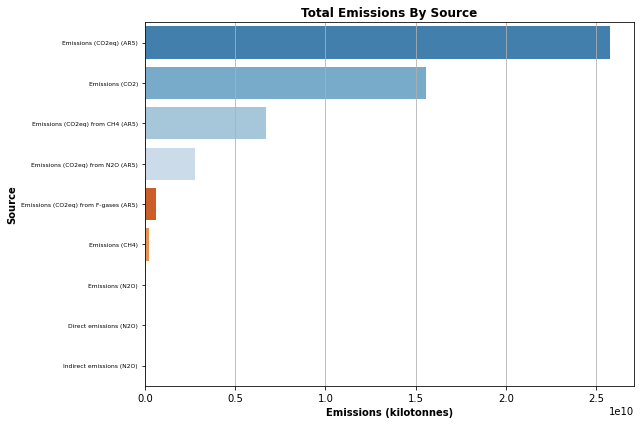

In [175]:
# Aggregate the data
df_agg = df2[['Element','Emissions_kt']].groupby(by=['Element']).sum().reset_index().sort_values(by='Emissions_kt', ascending=False)

plt.figure(figsize=(9,6))

ax = sns.barplot(data=df_agg, x='Emissions_kt', y='Element', palette=sns.color_palette("tab20c"))
ax.xaxis.grid()
ax.set_ylabel('Source', weight='bold')
ax.set_xlabel('Emissions (kilotonnes)', weight='bold')
ax.set_title('Total Emissions By Source', weight='bold')

plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()
# CO2eq = carbon dioxide equivalent
#AR5 = Fifth Assessment Report , Climate Change 
#seems Emission (CO2eq) (AR5) is the highest emission used by the total years

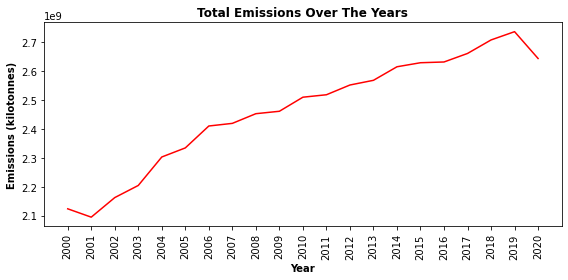

In [176]:
df_agg = df2[['Year','Emissions_kt']].groupby(by=['Year']).sum().reset_index()

plt.figure(figsize=(8,4))

ax = sns.lineplot(data=df_agg, x='Year', y='Emissions_kt', color='red')
ax.set_ylabel('Emissions (kilotonnes)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_title('Total Emissions Over The Years', weight='bold')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [214]:
#want to  elimnate some of the items that are not significant and leave the top 5
index_names = df2[(df2['Emissions_kt'] <= 10000000 )].index
# drop these given row
# indexes from dataFrame
df2.drop(index_names, inplace = True)
df2

,Area,Item,Element,Year,Emissions_kt
35978,World,Energy,Emissions (CO2),2000,23424334.21
35981,World,Energy,Emissions (CO2eq) (AR5),2000,26511331.38
36026,World,Emissions on agricultural land,Emissions (CO2eq) (AR5),2000,11002329.55
36040,World,Agri-food systems,Emissions (CO2eq) (AR5),2000,14865213.50
36078,World,All sectors with LULUCF,Emissions (CO2),2000,27492903.74
...,...,...,...,...,...
913009,OECD,Energy,Emissions (CO2eq) (AR5),2020,10952874.50
913089,OECD,All sectors with LULUCF,Emissions (CO2),2020,10458203.63
913093,OECD,All sectors with LULUCF,Emissions (CO2eq) (AR5),2020,14024804.49
913096,OECD,All sectors without LULUCF,Emissions (CO2),2020,10889190.14


In [215]:
pd.DataFrame(df2['Item'].unique().tolist())


,0
0,Energy
1,Emissions on agricultural land
2,Agri-food systems
3,All sectors with LULUCF
4,All sectors without LULUCF


In [210]:
df2.describe()

,Emissions_kt
count,4.556400e+04
mean,1.089023e+06
std,3.037214e+06
min,1.000028e+05
25%,1.665420e+05
50%,3.270107e+05
75%,7.841956e+05
max,5.414186e+07


/var/folders/4t/j0tpqxs11zz8x88ccnwr34rc0000gn/T/ipykernel_71115/542854495.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.lineplot(data=df_agg, x='Year', y='Emissions_kt', hue='Item',palette=sns.color_palette())


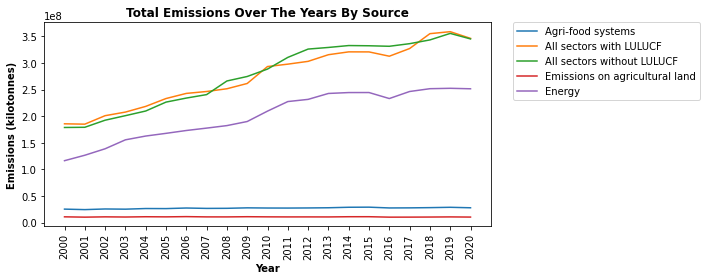

In [224]:
df_agg = df2[['Year', 'Item', 'Emissions_kt']].groupby(by=['Year', 'Item']).sum().reset_index()

plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df_agg, x='Year', y='Emissions_kt', hue='Item',palette=sns.color_palette())
ax.set_ylabel('Emissions (kilotonnes)', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_title('Total Emissions Over The Years By Source', weight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- You need to classify the types of emission, group by them, and forecast for each category
- e.g. for CO2 you might use only 10 years based on your features selection. But for NO2 you might use all the years based on your selection results.
- First, you need to divide the dataset to several different sub-datasets based on types of emission, And for each datasets, you have different TS model.
- The unit is the same (kilogram) but the types of emission makes the number means different stuff in this dataset. Thus, you cannot just use one dataset to build your model. 
- using 1 or 2 types of emission, you can build a model. 

Random forest, 

In [121]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz

In [77]:
pd.DataFrame(df['Area'].unique().tolist())

,0
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
260,Low Income Food Deficit Countries
261,Net Food Importing Developing Countries
262,Annex I countries
263,Non-Annex I countries


In [122]:
#pip install pycountry-convert
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        print(f"{country_name}: {continent_name}")
        return continent_name
    except KeyError:
        print(f"Error: {country_name}")
        return None
    
df['Continent'] = df['Area'].apply(get_continent)


Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanistan: Asia
Afghanista

In [123]:
df

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,5.200000e-01,5.267000e-01,8.200000e-01,9.988000e-01,8.225000e-01,1.182100e+00,...,1.372600e+00,1.401800e+00,1.458400e+00,1.242400e+00,1.194000e+00,1.061700e+00,8.988000e-01,1.217600e+00,1.317000e+00,Asia
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,1.170000e-01,1.185000e-01,1.845000e-01,2.247000e-01,1.851000e-01,2.660000e-01,...,3.088000e-01,3.154000e-01,3.281000e-01,2.795000e-01,2.687000e-01,2.389000e-01,2.022000e-01,2.740000e-01,2.963000e-01,Asia
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,6.370000e-01,6.452000e-01,1.004500e+00,1.223500e+00,1.007500e+00,1.448100e+00,...,1.681500e+00,1.717300e+00,1.786500e+00,1.522000e+00,1.462700e+00,1.300500e+00,1.101100e+00,1.491600e+00,1.613300e+00,Asia
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02,Asia
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,1.688070e+02,1.709884e+02,2.661975e+02,3.242195e+02,2.669995e+02,3.837498e+02,...,4.455958e+02,4.550727e+02,4.734174e+02,4.033181e+02,3.876130e+02,3.446447e+02,2.917838e+02,3.952689e+02,4.275284e+02,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58760,OECD,All sectors without LULUCF,Emissions (CO2),kilotonnes,1.334328e+07,1.326305e+07,1.332979e+07,1.352237e+07,1.366651e+07,1.369481e+07,...,1.270146e+07,1.274243e+07,1.261664e+07,1.253301e+07,1.241227e+07,1.243658e+07,1.254684e+07,1.217070e+07,1.088919e+07,None
58761,OECD,All sectors without LULUCF,Emissions (CO2eq) from F-gases (AR5),kilotonnes,3.941893e+05,3.882647e+05,4.176531e+05,4.392191e+05,4.672796e+05,5.080909e+05,...,7.826597e+05,8.006688e+05,8.326775e+05,8.546258e+05,8.741566e+05,8.884415e+05,9.049044e+05,9.172806e+05,9.208261e+05,None
58762,OECD,All sectors without LULUCF,Emissions (CO2eq) from CH4 (AR5),kilotonnes,2.145052e+06,2.126567e+06,2.093083e+06,2.038232e+06,2.047953e+06,2.008645e+06,...,1.971959e+06,1.922551e+06,1.934854e+06,1.924370e+06,1.880327e+06,1.915982e+06,1.923635e+06,1.882769e+06,1.825476e+06,None
58763,OECD,All sectors without LULUCF,Emissions (CO2eq) from N2O (AR5),kilotonnes,8.535273e+05,8.496131e+05,8.400758e+05,8.124412e+05,8.328157e+05,8.123489e+05,...,8.490201e+05,8.204159e+05,8.325680e+05,8.289014e+05,8.218071e+05,8.400423e+05,8.349622e+05,8.118189e+05,8.009744e+05,None


In [124]:
df = df.dropna()
print(df)

              Area                        Item  \
0      Afghanistan               Crop Residues   
1      Afghanistan               Crop Residues   
2      Afghanistan               Crop Residues   
3      Afghanistan               Crop Residues   
4      Afghanistan               Crop Residues   
...            ...                         ...   
56458   Micronesia  All sectors without LULUCF   
56459   Micronesia  All sectors without LULUCF   
56460   Micronesia  All sectors without LULUCF   
56461   Micronesia  All sectors without LULUCF   
56462   Micronesia  All sectors without LULUCF   

                                Element        Unit      2000      2001  \
0                Direct emissions (N2O)  kilotonnes    0.5200    0.5267   
1              Indirect emissions (N2O)  kilotonnes    0.1170    0.1185   
2                       Emissions (N2O)  kilotonnes    0.6370    0.6452   
3      Emissions (CO2eq) from N2O (AR5)  kilotonnes  168.8070  170.9884   
4               Emission

In [134]:
df3 = df[(df['Element'] == 'Emissions (CO2eq) (AR5)') | (df['Element'] == 'Emissions (CO2)')]
df3


,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156,Asia
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,118.6822,120.3242,123.4857,102.6989,107.1710,97.6259,74.5882,103.5392,121.4398,Asia
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,11113.7880,11006.6040,11152.0360,10715.4312,10648.1387,10382.7732,10611.9842,10189.2498,10600.4026,Asia
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,836.9089,832.8961,842.5037,797.9007,793.9377,768.6802,789.3364,766.5012,785.3315,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,Micronesia,AFOLU,Emissions (CO2eq) (AR5),kilotonnes,176.6645,176.5637,177.3436,177.4609,177.5866,177.7863,...,226.5732,228.4099,228.8963,230.0890,854.3282,854.1860,855.3033,856.9848,858.2546,Oceania
56453,Micronesia,All sectors with LULUCF,Emissions (CO2),kilotonnes,675.6134,693.3074,692.7734,693.9464,707.7694,695.5304,...,730.7773,751.3453,769.3213,783.6023,1399.2499,1415.0269,1450.3069,1513.3159,1506.0699,Oceania
56456,Micronesia,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,867.6154,888.9277,846.1659,857.1421,871.2662,890.1924,...,956.2389,923.9299,937.7363,957.5195,1573.8105,1592.6036,1628.2815,1693.2029,1685.4970,Oceania
56459,Micronesia,All sectors without LULUCF,Emissions (CO2),kilotonnes,561.4130,579.5340,579.0000,580.1730,593.9960,581.7570,...,576.5360,597.1040,615.0800,629.3610,622.0570,637.8340,673.1140,736.1230,728.8770,Oceania


In [135]:
pd.DataFrame(df3['Element'].unique().tolist())

,0
0,Emissions (CO2eq) (AR5)
1,Emissions (CO2)


In [136]:
df3

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Continent
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,Asia
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156,Asia
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,118.6822,120.3242,123.4857,102.6989,107.1710,97.6259,74.5882,103.5392,121.4398,Asia
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,11113.7880,11006.6040,11152.0360,10715.4312,10648.1387,10382.7732,10611.9842,10189.2498,10600.4026,Asia
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,836.9089,832.8961,842.5037,797.9007,793.9377,768.6802,789.3364,766.5012,785.3315,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,Micronesia,AFOLU,Emissions (CO2eq) (AR5),kilotonnes,176.6645,176.5637,177.3436,177.4609,177.5866,177.7863,...,226.5732,228.4099,228.8963,230.0890,854.3282,854.1860,855.3033,856.9848,858.2546,Oceania
56453,Micronesia,All sectors with LULUCF,Emissions (CO2),kilotonnes,675.6134,693.3074,692.7734,693.9464,707.7694,695.5304,...,730.7773,751.3453,769.3213,783.6023,1399.2499,1415.0269,1450.3069,1513.3159,1506.0699,Oceania
56456,Micronesia,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,867.6154,888.9277,846.1659,857.1421,871.2662,890.1924,...,956.2389,923.9299,937.7363,957.5195,1573.8105,1592.6036,1628.2815,1693.2029,1685.4970,Oceania
56459,Micronesia,All sectors without LULUCF,Emissions (CO2),kilotonnes,561.4130,579.5340,579.0000,580.1730,593.9960,581.7570,...,576.5360,597.1040,615.0800,629.3610,622.0570,637.8340,673.1140,736.1230,728.8770,Oceania


In [138]:
dummies = pd.get_dummies(df3[['Continent', 'Element']])
dummies

,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,0,1,0,0,0,0,0,1
7,0,1,0,0,0,0,0,1
16,0,1,0,0,0,0,0,1
22,0,1,0,0,0,0,0,1
30,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
56450,0,0,0,0,1,0,0,1
56453,0,0,0,0,1,0,1,0
56456,0,0,0,0,1,0,0,1
56459,0,0,0,0,1,0,1,0


In [139]:
merge = pd.concat([df3,dummies],axis=1)
merge


,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2020,Continent,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,427.5284,Asia,0,1,0,0,0,0,0,1
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,578.4156,Asia,0,1,0,0,0,0,0,1
16,Afghanistan,Burning - Crop residues,Emissions (CO2eq) (AR5),kilotonnes,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,...,121.4398,Asia,0,1,0,0,0,0,0,1
22,Afghanistan,Enteric Fermentation,Emissions (CO2eq) (AR5),kilotonnes,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,...,10600.4026,Asia,0,1,0,0,0,0,0,1
30,Afghanistan,Manure Management,Emissions (CO2eq) (AR5),kilotonnes,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,...,785.3315,Asia,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,Micronesia,AFOLU,Emissions (CO2eq) (AR5),kilotonnes,176.6645,176.5637,177.3436,177.4609,177.5866,177.7863,...,858.2546,Oceania,0,0,0,0,1,0,0,1
56453,Micronesia,All sectors with LULUCF,Emissions (CO2),kilotonnes,675.6134,693.3074,692.7734,693.9464,707.7694,695.5304,...,1506.0699,Oceania,0,0,0,0,1,0,1,0
56456,Micronesia,All sectors with LULUCF,Emissions (CO2eq) (AR5),kilotonnes,867.6154,888.9277,846.1659,857.1421,871.2662,890.1924,...,1685.4970,Oceania,0,0,0,0,1,0,0,1
56459,Micronesia,All sectors without LULUCF,Emissions (CO2),kilotonnes,561.4130,579.5340,579.0000,580.1730,593.9960,581.7570,...,728.8770,Oceania,0,0,0,0,1,0,1,0


In [142]:
final = merge.drop(['Area', 'Unit', 'Item', 'Element', 'Continent'], axis=1)
final


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2019,2020,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Element_Emissions (CO2),Element_Emissions (CO2eq) (AR5)
4,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,...,395.2689,427.5284,0,1,0,0,0,0,0,1
7,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,627.2000,666.4000,744.8000,784.0000,...,499.9176,578.4156,0,1,0,0,0,0,0,1
16,92.3047,80.9172,82.1318,118.6191,104.9208,121.1805,113.4512,114.7976,103.4756,120.7005,...,103.5392,121.4398,0,1,0,0,0,0,0,1
22,7619.9200,6311.2840,8061.0040,8221.5280,7996.7440,8271.2280,8422.5960,8518.3000,9507.6520,9678.4240,...,10189.2498,10600.4026,0,1,0,0,0,0,0,1
30,517.4928,426.2058,592.5613,603.1024,576.0374,604.7668,626.2428,647.4684,715.9345,725.4414,...,766.5012,785.3315,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56450,176.6645,176.5637,177.3436,177.4609,177.5866,177.7863,177.8318,178.8785,179.1215,181.8836,...,856.9848,858.2546,0,0,0,0,1,0,0,1
56453,675.6134,693.3074,692.7734,693.9464,707.7694,695.5304,698.7634,730.8734,671.8694,691.9824,...,1513.3159,1506.0699,0,0,0,0,1,0,1,0
56456,867.6154,888.9277,846.1659,857.1421,871.2662,890.1924,890.6366,904.8602,848.4638,898.7809,...,1693.2029,1685.4970,0,0,0,0,1,0,0,1
56459,561.4130,579.5340,579.0000,580.1730,593.9960,581.7570,584.9900,617.1000,558.0960,578.2090,...,736.1230,728.8770,0,0,0,0,1,0,1,0


In [155]:
from sklearn.linear_model import LinearRegression
import pandas as pd



# partition data
X = final.drop(columns=["2020"])
y = final["2020"]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

final_lm = LinearRegression()
final_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', final_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': final_lm.coef_}))

# print performance measures
regressionSummary(train_y, final_lm.predict(train_X))


intercept  -30.953908980358392
                          Predictor  coefficient
0                              2000    -0.008203
1                              2001     0.521091
2                              2002    -0.664414
3                              2003     0.410602
4                              2004    -0.545341
5                              2005     0.067058
6                              2006     0.381337
7                              2007     0.024147
8                              2008    -0.672407
9                              2009    -0.061843
10                             2010     0.556814
11                             2011     0.049222
12                             2012     0.053117
13                             2013     0.180751
14                             2014    -0.070859
15                             2015    -0.232497
16                             2016    -0.266197
17                             2017     0.810332
18                             2018   

In [157]:
# print performance measures
final_lm.predict(train_X)
#using test y to predict to see if test x is the correct prediction variable of y

array([1.67237560e+05, 4.06848794e+03, 7.36683922e+04, ...,
       2.19129388e+03, 1.16682960e+02, 2.79605990e+03])

using test y to predict to see if test x is the correct prediction variable of y